### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she eats at a restaurant with average expense greater than \\$50 per 
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day


#### Explanation
These columns represent the minimum time the driver needs to reach the coupon's location.

    - toCoupon_GEQ5min: At least 5 minutes away.
    - toCoupon_GEQ15min: At least 15 minutes away.
    - toCoupon_GEQ25min: At least 25 minutes away.
    
The naming convention "GEQ" typically stands for "Greater than or Equal to," and these columns are likely measuring if the coupon's location is at least a specified number of minutes away, which helps analyze if distance influences the acceptance of the coupon.
on.

To avoid the _future warnings_ that appear from time to time in plotting libraries, I am using the following snippet of code **before** importing pandas

<https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning>

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. 

Read in the `coupons.csv` file.

In [9]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. 

Investigate the dataset for missing or problematic data.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
data.Bar.value_counts(normalize=True, dropna=False)

Bar
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
NaN      0.008436
Name: proportion, dtype: float64

In [14]:
data.Restaurant20To50.value_counts(normalize=True, dropna=False)

Restaurant20To50
less1    0.479108
1~3      0.259382
never    0.168401
4~8      0.057395
gt8      0.020814
NaN      0.014901
Name: proportion, dtype: float64

In [15]:
data.CoffeeHouse.value_counts(normalize=True, dropna=False)

CoffeeHouse
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
NaN      0.017108
Name: proportion, dtype: float64

In [16]:
data.CarryAway.value_counts(normalize=True, dropna=False)

CarryAway
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
NaN      0.011905
Name: proportion, dtype: float64

In [17]:
data.RestaurantLessThan20.value_counts(normalize=True, dropna=False)

RestaurantLessThan20
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
never    0.017345
NaN      0.010249
Name: proportion, dtype: float64

In [18]:
data.isna().sum() 

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

### Data Investigation
Here we describe what we see as problematic or missing data. 

![Missing Data summary](images/data_NaN_summary.png)

1. The _cars_ column has very little data - less than 1%, so we will **drop** it, since it gives no significant information.
2. All other columns are fully entered - we will see if they have unusable data as we progress.

One category that seems a bit confusing is the _less1_ and _never_ category. At first glance these seem to mean the same thing, but after some reflection it could mean that all the counts for Food Habits are possibly counted over time. 

Looking at questions later on in this assignment it becomes clear that the period used here is **month**. So we conclude _never_ to mean during the trial the customer has never visited that type of establishment if that count is denoted as _never_ but we take the _less1_ category to mean that the customer has possibly visited say a *coffeehouse*, at least once but less than a month. This can prove useful while deciding to issue a coupon in future - such as enticing the customer to try a *new* kind of food establishment that they may not have frequented often. 

## 3.

Decide what to do about your missing data -- drop, replace, other...

We will decide to **drop** the _car_ column.

In [22]:
data.drop('car', axis = 1, inplace=True)

The following columns have **NaN** values - it makes sense to mark these as "less1" - because it may prove useful in certain cases while deciding to offer coupons. 

1. _Bar_
2. _CoffeeHouse_
3. _CarryAway_
4.  _RestaurantLessThan20_
5.  _Restaurant20To50_



In [24]:
data['Bar'] = data['Bar'].fillna('less1')

In [25]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')
data['CarryAway'] = data['CarryAway'].fillna('less1')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('less1')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')

## 4.

What proportion of the total observations chose to accept the coupon? 

<p style="color:blue">
We look at the column Y that contains the value 1 if accepted or 0 if not accepted. 
We use the value_counts method on Y and apply the normalize parameter to get the answer in percentage. 
</p>

In [28]:
data.Y.value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

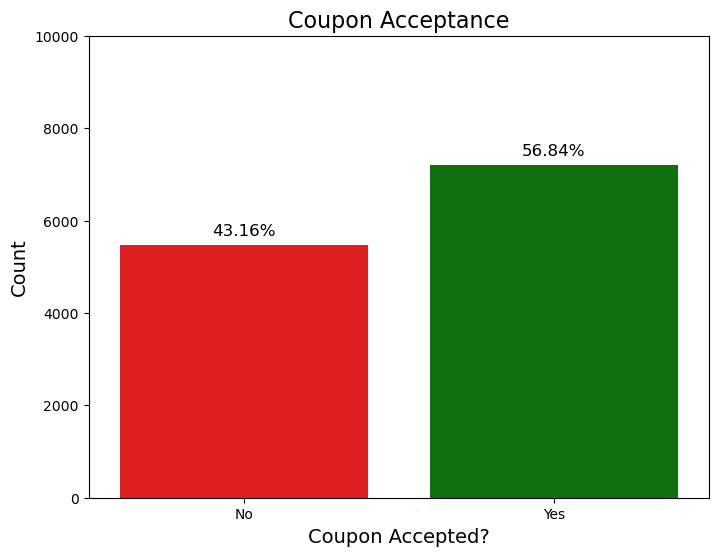

In [29]:
sns.reset_defaults()

# Creating the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data,
    x='Y', 
    palette = ['red', 'green']
)
plt.title('Coupon Acceptance', fontsize=16)
plt.xlabel('Coupon Accepted?', fontsize=14)
plt.ylabel('Count', fontsize=14)  # Updated y-axis label
plt.ylim(0, 10000)
plt.xticks(ticks=range(2), labels=["No", "Yes"])

# Adding percentage labels on top of the bars
total = len(data)  # Calculate the total number of data points
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, 
                (x, y), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                fontsize = 12,
                textcoords='offset points')

plt.savefig(
    "images/coupons_acceptance_graph.png", 
    bbox_inches ="tight", 
    format = "png")
plt.show()

It is seen that **56.84%** of the total observations chose to accept the coupon.

## 5. 

Use a bar plot to visualize the `coupon` column.

<p style="color:blue">
To view the coupon column - 
</p>

we use the **value_counts** method and obtain the count of each type of coupon issued, and save the data into a new variable - which is a series that has an index for each category and a value that is a count for that category.


In [33]:
coupon_data = data.coupon.value_counts()

We then plot using Seaborn barplot method. 
To get a good color scheme we use the "virdis" scheme. 

In additon to get the labels with more meaningful names and a sorted order - we create custom label names and order them appropriately.

Finally for the plot labels we use appropriate font size and also rotate the X axis labels for aesthetics. 

While saving the figure we add some padding since we seem to clipping the bottom part with default parameters. 

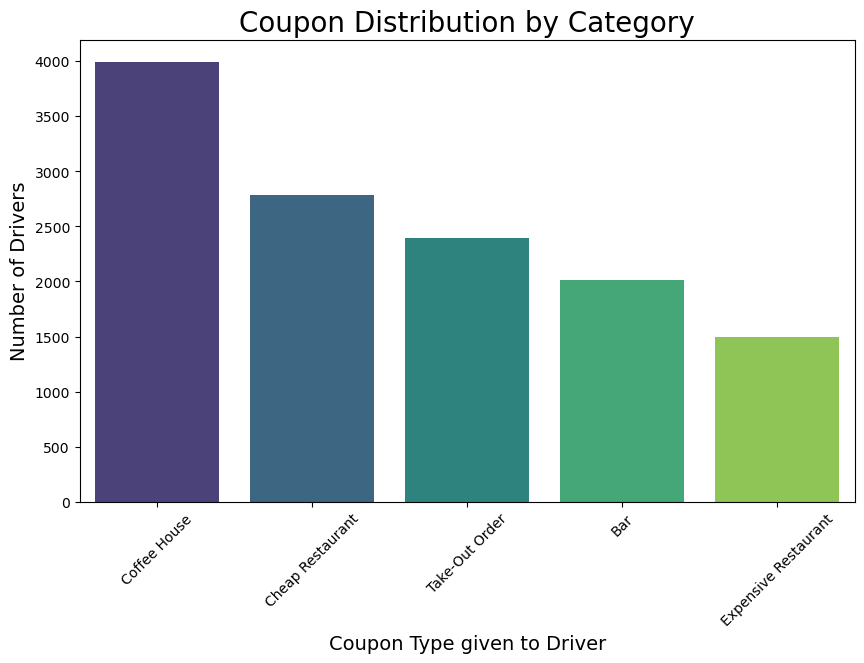

In [35]:
sns.reset_defaults()
plt.figure(figsize=(10,6))
sns.barplot(
    x = coupon_data.index, 
    y = coupon_data.values,
    palette = 'viridis'
)

custom_order = ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)',]
new_labels = {'Coffee House': 'Coffee House', 
              'Bar' : 'Bar',
              'Restaurant(<20)' : 'Cheap Restaurant' , 
              'Carry out & Take away' : 'Take-Out Order',
              'Restaurant(20-50)' : 'Expensive Restaurant',
             }

plt.title('Coupon Distribution by Category', fontsize = 20)
plt.xlabel('Coupon Type given to Driver', fontsize = 14)
plt.ylabel('Number of Drivers', fontsize = 14)
plt.xticks(
    ticks = range(len(custom_order)),
    labels = [new_labels[cat] for cat in custom_order],
    fontsize = 10,
    rotation=45
)

plt.savefig(
    "images/coupon_food_distribution.png", 
    bbox_inches ="tight", 
    pad_inches = 1, 
    format = "png")
plt.show()

6. Use a histogram to visualize the temperature column.

In [37]:
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

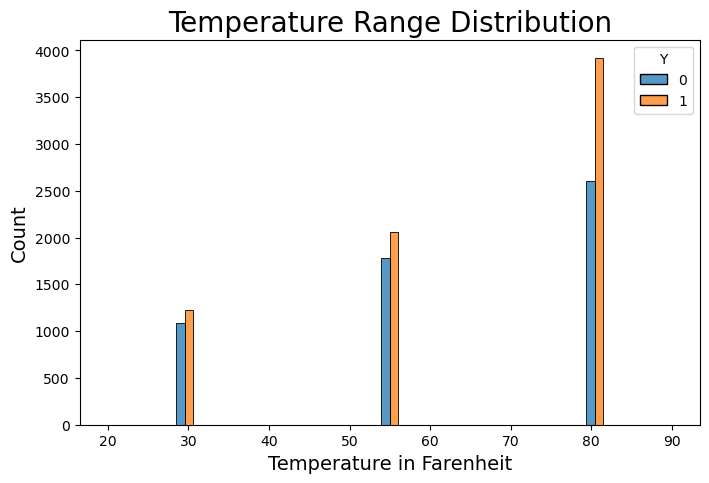

In [38]:
sns.reset_defaults()
plt.figure(figsize=(8,5))

sns.histplot(data,
             x = 'temperature',
             hue = 'Y',
             binrange = (20, 90),
             multiple = "dodge",
             color = 'darkorange',
            )
plt.title('Temperature Range Distribution', fontsize = 20)
plt.xlabel('Temperature in Farenheit', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.savefig(
    "images/temperatures.png", 
    bbox_inches ="tight", 
    format = "png");
plt.show()

### Temperature Viz.

Coupon acceptance is greatest at a higher temperature - showing more openness to driving out for food in more comfortable weather conditions. 

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. 
Create a new `DataFrame` that contains just the bar coupons.

In [41]:
bar_coupon_df = data.query('coupon == "Bar"')

In [42]:
bar_coupon_df.shape

(2017, 25)

## 2. 

What proportion of bar coupons were accepted?

In [44]:
bar_coupon_df.Y.value_counts(normalize=True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

## Answer to #2

It is observed that **41.00%** of Bar coupons were accepted.

## 3. 

Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Looking at those who went to the Bar 3 times or fewer - means those who belong to the group : 
`["never", "less1", "1~3"]`

In [48]:
bar_coupon_df.query('Bar in ["never", "less1", "1~3"]')['Y'].value_counts(normalize = True)

Y
0    0.629263
1    0.370737
Name: proportion, dtype: float64

In [49]:
bar_coupon_df.query('Bar in ["never", "less1", "1~3"]')['Y'].shape

(1818,)

Looking at those who went to the bar more than 3 times - means those who belong to the group:
`["4~8", "gt8"]`

In [51]:
bar_coupon_df.query('Bar in ["4~8", "gt8"]')['Y'].value_counts(normalize = True)

Y
1    0.768844
0    0.231156
Name: proportion, dtype: float64

In [52]:
bar_coupon_df.query('Bar in ["4~8", "gt8"]')['Y'].shape

(199,)

Validating that the 2 groups we calculated totals the total number of observations in the dataframe.

1818 + 199 = **2017** (i.e. total rows in _bar_coupon_df_ )

## Answer to #3
**37.07%** of those who went to a bar 3 times or fewer accepted the coupon.

**76.88%** of those who went to the bar more than 3 times accepted the coupon.

## Question 4. 

Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

This group consists of those who go to the Bar more than once a month 
- i.e. `["1~3", "4~8", "gt8"]`  **AND**
Are of ages greater than 25 years, i.e. not in `["21", "below21"]`

In [57]:
bar_coupon_df['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [58]:
bar_coupon_df['Bar'].value_counts()

Bar
never    830
less1    591
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [59]:
bar_coupon_df.query('Bar in ["1~3", "4~8", "gt8"]  and age not in ["21", "below21"]')['Y'].count()

420

In [60]:
bar_coupon_df.query('Bar in ["1~3", "4~8", "gt8"]  and age not in ["21", "below21"]')['Y'].value_counts(normalize = True)

Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64

Now taking all others not belonging to this group:

We will use the boolean logic of 
**¬(A ∧ ¬B) ≡ ¬A ∨ B**

In [62]:
bar_coupon_df.query('Bar not in ["1~3","4~8", "gt8"] or age in ["21", "below21"]')['Y'].value_counts(normalize = True)

Y
0    0.664997
1    0.335003
Name: proportion, dtype: float64

In [63]:
bar_coupon_df.query('Bar not in ["1~3","4~8", "gt8"] or age in ["21", "below21"]')['Y'].count()

1597

## Answer to #4 

**69.52%** of this sub-group accepted the coupon to go to the bar.

This compares to **33.50%** of all others.

## 5. 

Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Here we choose this subgroup:
1. More than once a month - i.e. `["1~3",  "4~8" and "gt8"]`  **AND**
2. Did not have passengers who were kids i.e. not in `["Kid(s)"]` **AND**
3. Occupations not in `["Farming Fishing & Forestry"]`

In [67]:
bar_coupon_df['passanger'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [68]:
bar_coupon_df['occupation'].value_counts(normalize = True)

occupation
Unemployed                                   0.149232
Student                                      0.124442
Computer & Mathematical                      0.115022
Sales & Related                              0.088250
Education&Training&Library                   0.069410
Management                                   0.058999
Office & Administrative Support              0.052058
Arts Design Entertainment Sports & Media     0.049579
Business & Financial                         0.044125
Retired                                      0.037184
Food Preparation & Serving Related           0.023798
Community & Social Services                  0.021815
Healthcare Support                           0.021815
Healthcare Practitioners & Technical         0.020327
Transportation & Material Moving             0.017353
Legal                                        0.016857
Architecture & Engineering                   0.013386
Personal Care & Service                      0.013386
Protective Servic

In [69]:
bar_coupon_df.query(
    'Bar in ["1~3", "4~8", "gt8"] and \
    passanger not in ["Kid(s)"] and \
    occupation not in ["Farming Fishing & Forestry"]'
    )['Y'].shape

(551,)

In [70]:
bar_coupon_df.query(
    'Bar in ["1~3", "4~8", "gt8"] and \
    passanger not in ["Kid(s)"] and \
    occupation not in ["Farming Fishing & Forestry"]'
    )['Y'].value_counts(normalize = True)

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64

We use similar Boolean logic to get all others and compare their acceptance rates.

**(¬(A ∧ ¬B ∧ ¬C) ≡ ¬A ∨ B ∨ C)**


In [72]:
bar_coupon_df.query(
    'Bar not in ["1~3", "4~8", "gt8"] or \
    passanger in ["Kid(s)"] or \
    occupation in ["Farming Fishing & Forestry"]'
)['Y'].shape


(1466,)

In [73]:
bar_coupon_df.query(
    'Bar not in ["1~3", "4~8", "gt8"] or \
    passanger in ["Kid(s)"] or \
    occupation in ["Farming Fishing & Forestry"]'
)['Y'].value_counts(normalize=True)

Y
0    0.703956
1    0.296044
Name: proportion, dtype: float64

## Answer to 5

**71.32%** in this sub-group accepted the coupon, as opposed to **29.60%** in the others.

## Question 6. 

Compare the acceptance rates between those drivers who:
 - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
 - go to bars more than once a month and are under the age of 30 *OR*
 - go to cheap restaurants more than 4 times a month and income is less than 50K. 

Let us first find some of the category values for those columns we are interested in implementing this grouping.

These columns are :
  - income
  - age
  - maritalStatus

In [77]:
bar_coupon_df['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [78]:
bar_coupon_df['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [79]:
bar_coupon_df['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Next Let's create the filter for this group:
  - Bar in `["1~3", "4~8", "gt8"] AND passanger not in["Kid(s)] AND maritalStatus not in["Widowed]`   **OR**
  - Bar in `["1\~3", "4\~8", "gt8"] AND age in ["below21", "21", "26"]`  **OR**
  - Restaurants20To50 in `["4~8", "gt8"] AND income in ["Less than \$12500\", "\$12500 - \$24999", "\$25000 - \$37499", "\$37500 - \$49999"]`

In [81]:
more_than_once_a_month = ["1~3", "4~8", "gt8"]
age_below_30 = ["below21", "21", "26"]  
more_than_4_times_a_month = ["4~8", "gt8"]
income_LT_50K = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

In [82]:
bar_coupon_df.query(' \
    (Bar in @more_than_once_a_month and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"] ) \
    or \
    (Bar in @more_than_once_a_month and age in @age_below_30) \
    or \
    (RestaurantLessThan20 in @more_than_4_times_a_month and income in @income_LT_50K) \
    ' \
)['Y'].shape

(776,)

In [83]:
bar_coupon_df.query(' \
    (Bar in @more_than_once_a_month and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"] ) \
    or \
    (Bar in @more_than_once_a_month and age in @age_below_30) \
    or \
    (RestaurantLessThan20 in @more_than_4_times_a_month and income in @income_LT_50K) \
    ' \
)['Y'].value_counts(normalize = True)

Y
1    0.588918
0    0.411082
Name: proportion, dtype: float64

Now to create the group which is all others - so we have to do the query but add a **NOT** at the beginning. 

In [85]:
bar_coupon_df.query(' \
    not \
        ( \
            (Bar in @more_than_once_a_month and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"] ) \
        or \
            (Bar in @more_than_once_a_month and age in @age_below_30) \
        or \
            (RestaurantLessThan20 in @more_than_4_times_a_month and income in @income_LT_50K) \
        ) \
    ' \
)['Y'].shape

(1241,)

In [86]:
bar_coupon_df.query(' \
    not \
        ( \
            (Bar in @more_than_once_a_month and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"] ) \
        or \
            (Bar in @more_than_once_a_month and age in @age_below_30) \
        or \
            (RestaurantLessThan20 in @more_than_4_times_a_month and income in @income_LT_50K) \
        ) \
    ' \
)['Y'].value_counts(normalize = True)

Y
0    0.701853
1    0.298147
Name: proportion, dtype: float64

## Answer to 6

We find that **58.89%** accepted the coupon in the grouping we created. There were a total of 776 records that met the criteria.

In the **all others** for this grouping, we find that **29.81%** of drivers accepted the coupon. 

## 7.  

Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

-  To start with in Question #1 we observe that **41%** of those drivers who were offered Bar coupons accepted them. 
-  We now look at some sub-groups to see what other characteristics of the drivers are significant in the probability that the drivers accepted the Bar coupons.
  -  In Question #3 above we see that **76.88%** of those who frequent the bars more than 3 times a month accepted the coupon this is almost **twice** the rate of all the drivers who were offered a Bar coupon.
  -  In Question #4 - we lower the bar - not pun intended 😂 and look at drivers who frequent bars at least once a month and are well above legal age of drinking, i.e. 25 years and above. Here we also find significantly higher rates accepted the coupon at **69.52%**
  -  IMHO, question #5 did not give us any extra insight since this group's coupon acceptance at **71.32%** was mostly similar to those we found in Q4. The subgroup of the occupation selected is too small at 0.5% of the total to be of any relavance. The main grouping of selecting those who frequent bars at least once a month is the key discerning factor here.
  -  In Question #6 - we have too many criteria and we seem to be OR'ing them - so the final answer is not in anyway useful in getting us any insight as to who to target in future.

**Summary**
In summary the main point about those who accept Bar coupons are those who frequent the Bars - all those who go to Bars at least once a month were **twice** more than likely to accept the coupon. 


$$

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [91]:
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [92]:
data['direction_opp'].value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

Among those who have accepted the coupon - let's find out various characteristics of where the chosen restaurant was in terms of driving time and the direction (same or opposite). 


### 1

Let's check whether the column direction_same and direction_opposite are mutually exclusive. 

In [95]:
data[(data['direction_same'] == 0) & (data['direction_opp'] == 0)] 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [96]:
data[(data['direction_same'] == 1) & (data['direction_opp'] == 1)] 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


Looks like they **are** mutually exclusive, so we can move ahead.

### 2. 
We note that these are 3 categories of restaurants in terms of driving distance - those that are > 25 minutes away, > 15 minutes away and > 5 minutes away. Let's find out if these are independant sets or cumulative. i.e. Would a retaurant >25 minutes away also be included in thsoe that are >15 and >5 minutes away?

In [99]:
data.query('toCoupon_GEQ25min == 1')[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].head(1)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
16,1,1,1


Looks like these are **cumulative**, so we will have to be careful as we analyze the data. 

We will go ahead and create 3 seperate data frames to help us analyze if distance to the offered food location. 

Each dataframe has only those observations that limit the coupons only for that category timeframe. 

In [102]:
data_with_only_GTE25_coupons = data[( (data['toCoupon_GEQ25min'] == 1) & (data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ5min'] == 1) )]
data_with_only_GTE15_coupons = data[( (data['toCoupon_GEQ25min'] == 0) & (data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ5min'] == 1) )]
data_with_only_GTE5_coupons = data[( (data['toCoupon_GEQ25min'] == 0) & (data['toCoupon_GEQ15min'] == 0) & (data['toCoupon_GEQ5min'] == 1) )]

In [103]:
data_with_only_GTE5_coupons.query('direction_same == 1')['Y'].value_counts(normalize=True)

Y
1    0.600303
0    0.399697
Name: proportion, dtype: float64

In [104]:
data_with_only_GTE5_coupons.query('direction_opp == 1')['Y'].value_counts(normalize=True)

Y
1    0.621825
0    0.378175
Name: proportion, dtype: float64

### 3.

First observation - those who had coupons **between 5 and 15 minutes away** - it did not matter whether it was in the same direction or opposite - the acceptance rate was similar - showing that whether the food establishment was in their **direction did not matter**. 

In [106]:
data_with_only_GTE15_coupons.query('direction_same == 1')['Y'].value_counts(normalize=True)

Y
1    0.534228
0    0.465772
Name: proportion, dtype: float64

In [107]:
data_with_only_GTE15_coupons.query('direction_opp == 1')['Y'].value_counts(normalize=True)

Y
1    0.564735
0    0.435265
Name: proportion, dtype: float64

### 4.

Next, we see similar results for the cohort that is **15 to 25 minutes away** - the direction of their travel **did not matter**. 

In [109]:
data_with_only_GTE25_coupons.query('direction_same == 1')['Y'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [110]:
data_with_only_GTE25_coupons.query('direction_opp == 1')['Y'].value_counts(normalize=True)

Y
0    0.571145
1    0.428855
Name: proportion, dtype: float64

In [111]:
data[(data['toCoupon_GEQ25min'] == 1) & (data['Y'] == 1)]['direction_same'].value_counts(normalize = True)

direction_same
0    1.0
Name: proportion, dtype: float64

### 5.

Here we see something interesting. When the food establishment was **more than 25 minutes away, no one** who was going in the **same direction** accepted!
<font color="red">This seems suspicious as a matter of data collection.</font> 

A slightly less percentage accepted those who were 25 minutes or more away but going the opposite direction.    

## 6.

Here we analyze the data about coupon acceptance based on age group of the drivers.

We are going to use Seaborn library to create a visualization to view the data. 

First we convert the category names from pandas Object to a string type to help in charting. 

In [115]:
data['age'] = data['age'].astype(str)
data['Y'] = data['Y'].astype(str)

First we reset the Seaborn library to clear any defaults from previous charts. 

Then we create a new order for the labels in the X-Axis - this is done so that the age groups are in a meaningful and progressive manner. We will be utilizating this in both sorting the data in the datframe as supplied to Seaborn as well as in the X-axis labels & ticks. 

In [117]:
sns.reset_defaults()

# Re-Order the X axis 
custom_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus',]
new_labels = {'below21': '< 21 Years', 
              '21' : '21 - 25 Years',
              '26' : '26 - 30 years' , 
              '31' : '31 - 40 years',
              '36' : '36 - 40 years',
              '41' : '41 - 45 years',
              '46' : '46 - 50 years',
              '50plus' : '50+ years',
             }

We initialize the plot with the dimensions of the figure - here we use a 10" x 6" canvas.

Then we call the seborn library with the data and the axis data. To get a appealing color palette we use a "husl" scheme, finally we specify the order of the data that we created in the previous cell.

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(
    data = data,
    x = 'age',
    hue = 'Y',
    palette = 'husl',  
    order = custom_order,
    stat = 'count'
);

Next, we fine tune the labels and the title, and specify the order of the labels to be used in X axis labels. We also rotate the labels to provide readability.

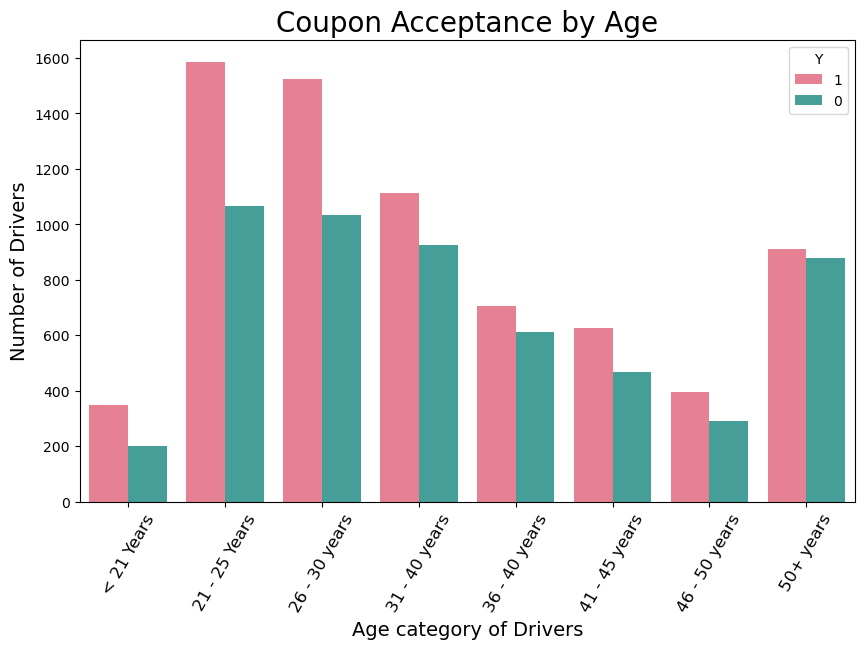

In [121]:
plt.title('Coupon Acceptance by Age', fontsize = 20);
plt.xlabel('Age category of Drivers', fontsize = 14);
plt.ylabel('Number of Drivers', fontsize = 14);
plt.xticks(
    ticks = range(len(custom_order)),
    labels = [new_labels[cat] for cat in custom_order],
    fontsize = 12,
    rotation=60
)

#plt.legend()
plt.savefig(
    "images/coupons_age.png", 
    bbox_inches ="tight", 
    format = "png")
plt.show()

### Analysis and Summary of Observation

We noted earlier that in the entire dataset the coupon acceptance is **56.84%** so as a general observation more drivers accepted the coupon than not. 

Here we delver deeper into the drivers age groups to see which group were more succeptible to use the coupon. While many groups tended to mirror the total population, these 2 groups significantly had higher acceptanec rates - **21-25** Year-olds and **26-30** Year-olds. This demographic would be best suited in future promostions to be targetted with coupons. 